<h1>CIFAR-10 Klassifizierung mit CNN</h1>

Wie bei TensorFlow ist die Verwendung von PyTorch relative einfach und überschaubar.

Das Notebook deckt dasselbe Thema ab, wie das Notebook das mit TensorFlow erstellt wurde.

Das CIFAR-10 Dataset hat 10 Klassen und insgesamt 60K Bilder in der Auflösung 32x32. 50K für das Training und 10K für das Testen.

> The CIFAR-10 dataset
https://www.cs.toronto.edu/~kriz/cifar.html [Letzter Zugriff: 09.07.2024]
>
> Reference:
Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.

Wie auch bei TensorFlow bietet PyTorch auch Build-In Datasets an, die z. B. für Versuche genutzt werden können.

In [28]:
# Imports.
import torch   as pt
import torchvision 
import pandas  as pd
import seaborn as sns

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [29]:
torchvision.__version__

'0.18.1+cpu'

In [30]:
pt.__version__

'2.3.1+cpu'

<h2>Dataset und Details</h2>

In [14]:
# Gebe Transformation an.
# - Data Argumentation, um Overfitting zu vermeiden. Daten können auch direkt normalisiert werden.
# - Siehe:
# https://pytorch.org/vision/main/generated/torchvision.transforms.Compose.html
# https://pytorch.org/vision/stable/transforms.html
# https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_getting_started.html
# https://www.geeksforgeeks.org/how-to-normalize-images-in-pytorch/
transform = torchvision.transforms.Compose([  # Liste der Transformationen. 
   # torchvision.transforms. < Transformation >
    torchvision.transforms.ToTensor(),  # Bild zu Tensor [c, w, h]
    torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.5, 0.5, 0.5)),
    torchvision.transforms.RandomRotation(0.2)
    # Weitere Angaben.
    
])

In [31]:
# Erstellt direkt Trainingset.
# - Siehe Parameter. 
# - Beim Ersten mal:  download=True
trainset = torchvision.datasets.CIFAR10(root="./data/datasets", train=True, download=False)

<Figure size 200x200 with 0 Axes>

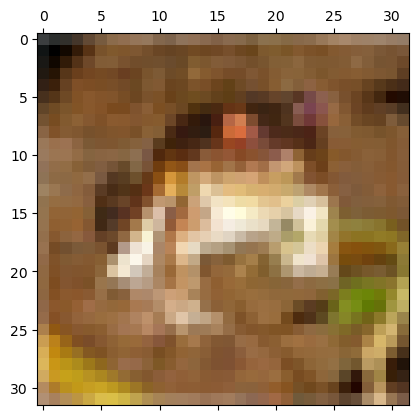

In [35]:
plt.figure(figsize=(2,2))
plt.matshow(trainset[0][0])

In [36]:
# Wende Transformation an. 
trainset = torchvision.datasets.CIFAR10(root="./data/datasets", train=True, download=False,  transform=transform)

In [37]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data/datasets
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.5, 0.5, 0.5))
               RandomRotation(degrees=[-0.2, 0.2], interpolation=nearest, expand=False, fill=0)
           )

Einer der größten Unterschiede zu TensorFlow ist, dass es standardmäßig eine Trainingsschleife gibt, die beliebig angepasst werden kann.

In [38]:
stop = 5
i=0
for x, y in enumerate(trainset):
    print(x, y)  # Ausgabe Bild und Klasse. 
    i+=1
    if i ==stop:
        break  

0 (tensor([[[-0.5073, -0.6327, -0.5778,  ...,  0.2692,  0.2222,  0.1908],
         [-0.8445, -0.9700, -0.8288,  ..., -0.0053, -0.0367, -0.0131],
         [-0.7739, -0.8445, -0.5857,  ..., -0.0445, -0.0288, -0.1151],
         ...,
         [ 0.6614,  0.6065,  0.5829,  ...,  0.2849, -0.5308, -0.5543],
         [ 0.4418,  0.3869,  0.4888,  ...,  0.4731, -0.2092, -0.3190],
         [ 0.4182,  0.3476,  0.4339,  ...,  0.7241,  0.2143, -0.0053]],

        [[-0.4257, -0.5512, -0.5355,  ...,  0.1233,  0.0684,  0.0605],
         [-0.7551, -0.9120, -0.8493,  ..., -0.2218, -0.2610, -0.2296],
         [-0.7238, -0.8571, -0.7002,  ..., -0.2532, -0.2532, -0.3395],
         ...,
         [ 0.4213,  0.2880,  0.3507,  ...,  0.1311, -0.6689, -0.6453],
         [ 0.1782,  0.0527,  0.2174,  ...,  0.2488, -0.4257, -0.4963],
         [ 0.2174,  0.0998,  0.2017,  ...,  0.5311,  0.0135, -0.1904]],

        [[-0.3179, -0.4591, -0.4747,  ...,  0.0351, -0.0120, -0.0042],
         [-0.6551, -0.8120, -0.8120,  ...,

In [18]:
trainset[0]

(tensor([[[-0.5073, -0.6327, -0.5778,  ...,  0.2692,  0.2222,  0.1908],
          [-0.8445, -0.9700, -0.8288,  ..., -0.0053, -0.0367, -0.0131],
          [-0.7739, -0.8445, -0.5857,  ..., -0.0445, -0.0288, -0.1151],
          ...,
          [ 0.6614,  0.6065,  0.5829,  ...,  0.2849, -0.5308, -0.5543],
          [ 0.4418,  0.3869,  0.4888,  ...,  0.4731, -0.2092, -0.3190],
          [ 0.4182,  0.3476,  0.4339,  ...,  0.7241,  0.2143, -0.0053]],
 
         [[-0.4257, -0.5512, -0.5355,  ...,  0.1233,  0.0684,  0.0605],
          [-0.7551, -0.9120, -0.8493,  ..., -0.2218, -0.2610, -0.2296],
          [-0.7238, -0.8571, -0.7002,  ..., -0.2532, -0.2532, -0.3395],
          ...,
          [ 0.4213,  0.2880,  0.3507,  ...,  0.1311, -0.6689, -0.6453],
          [ 0.1782,  0.0527,  0.2174,  ...,  0.2488, -0.4257, -0.4963],
          [ 0.2174,  0.0998,  0.2017,  ...,  0.5311,  0.0135, -0.1904]],
 
         [[-0.3179, -0.4591, -0.4747,  ...,  0.0351, -0.0120, -0.0042],
          [-0.6551, -0.8120,

In [22]:
trainset[0][0].shape

torch.Size([3, 32, 32])

In [41]:
# Erstelle Map für Klassen.
classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_dict = {}
for i in range(len(classes)):
    class_dict[i] = classes[i]
class_dict

{0: 'plane',
 1: 'car',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [43]:
# Testset:
# - train=False
testset     = torchvision.datasets.CIFAR10(root="./data/datasets", train=True, download=False,  transform=transform)

# Dataloader haben verschiedene wichtige Parameter. 
# - Hier nutzen wir nur einige.

trainloader = pt.utils.data.DataLoader( trainset )
testloader  = pt.utils.data.DataLoader( trainset )

Danach erstellen wir das Model.

<h2>Model und Training</h2>

In [44]:

# - Siehe:
#   nn:     https://pytorch.org/docs/stable/nn.html
#   Conv2D: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d
#   torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

# in_channels=3, wenn RGB, wenn grau: 1.  
# out_channels: n-feature Maps, diese dann als Input nutzen. 
# kernel_size: größe des Filters. Int oder Tupel. 
# Zusammengefasst: pt.nn.Conv2d(in_channels,  out_channels, kernel_size, ...) 

class my_model(pt.nn.Module):
    def __init__(self):
        super().__init__()
        # Erstelle verschiedene Schichten.
        # - Faltungsnetz 
        self.conv1 = pt.nn.Conv2d(in_channels=3, out_channels=5, kernel_size=(3, 3))
        self.pool  = pt.nn.MaxPool2d(2, 2)  # Pooling. pt.nn.MaxPool2d(kernel_size=2, stride=2, padding=0, ...) 
        self.conv2 = pt.nn.Conv2d(5, 14, 5)
        # - ANN
        self.fc1 = pt.nn.Linear(14 * 5 * 5, 100) #  torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)
        self.fc2 = pt.nn.Linear(100, 50)
        self.fc3 = pt.nn.Linear(50, 10)
        
    # Forward-Pass.
    def forward(self, x):
        # Nutze definiertes Pooling und Aktivierungsfunktion. 
        x = self.pool( pt.nn.functional.relu( self.conv1(x) ))
        x = self.pool( pt.nn.functional.relu( self.conv2(x) ))
        # Flattern und an ANN anschließen. 
        x = pt.flatten(x, 1) 
        x = pt.nn.functional.relu( self.fc1(x))
        x = pt.nn.functional.relu( self.fc2(x))
        x = self.fc3(x)
        return x

In [45]:
model = my_model()

In [46]:
model

my_model(
  (conv1): Conv2d(3, 5, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(5, 14, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=350, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=10, bias=True)
)

In [47]:
# Erstelle Kostenfunktion und Optimierer für Gradientenabstieg.

criterion = pt.nn.CrossEntropyLoss()
optimizer = pt.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [48]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

Dann erstellen wir eine Trainingsschleife, wo einiges an Zusätzen dazugepackt werden kann. 

In [49]:
epoches = 2
for epoch in range(epoches):   # n-Epochen

    epochs_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):  # Iteriere durch Dataset. 
        
        inputs, labels = data

        # Setze Gradienten auf 0 für jedes mini-Batch.
        optimizer.zero_grad()

        outputs = model(inputs)   # Fowards-Pass: Schiebe Daten in das Netz und hole Ergebnis. Siehe: https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html
        loss = criterion(outputs, labels)  # Berechne den Fehler mit der angegebenen Kostenfunktion. 
        loss.backward()                    # Passe Weights durch den angegebenen Gradientenasbtieg an. 
        
        optimizer.step()  # Führe die Anpassung jetzt durch. 

        # PyTorch liefert von sich aus keine Ausgaben wie TensorFlow.
        # - Hier können wir kreative Outputs generieren (oder an jeder anderen Stelle in der Schleife)
        epochs_loss += loss.item()
        if i % 2000 == 1999:    # Ausgabe alle 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {epochs_loss / 2000:.3f}')
            running_loss = 0.0

[1,  2000] loss: 2.293
[1,  4000] loss: 4.392
[1,  6000] loss: 6.357
[1,  8000] loss: 8.220
[1, 10000] loss: 10.028
[1, 12000] loss: 11.783
[1, 14000] loss: 13.495
[1, 16000] loss: 15.206
[1, 18000] loss: 16.867
[1, 20000] loss: 18.497
[1, 22000] loss: 20.128
[1, 24000] loss: 21.703
[1, 26000] loss: 23.261
[1, 28000] loss: 24.812
[1, 30000] loss: 26.365
[1, 32000] loss: 27.904
[1, 34000] loss: 29.525
[1, 36000] loss: 31.099
[1, 38000] loss: 32.658
[1, 40000] loss: 34.204
[1, 42000] loss: 35.738
[1, 44000] loss: 37.317
[1, 46000] loss: 38.866
[1, 48000] loss: 40.383
[1, 50000] loss: 41.890


Am Ende ohne die Kommentare und Erklärungen sieht es kompakt und sauber aus. 

<h2>Testen</h2>

Als Output bekommen wir einen Tensor. Der Index des höchsten Wertes gibt die Klasse an, die vorhergesagt wird.

In [50]:
# Index des höchsten Wertes. 
pt.max(pt.tensor([[ 0.1,  0.2, 0.3]]), 1)

torch.return_types.max(
values=tensor([0.3000]),
indices=tensor([2]))

In [51]:
pt.max(pt.tensor([[ 0.2,  0.4, 0.1]]), 1)

torch.return_types.max(
values=tensor([0.4000]),
indices=tensor([1]))

In [52]:
with pt.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        print(outputs)
        break

tensor([[-1.2708, -2.0719,  1.2771,  2.1320,  0.5370,  1.4362,  1.5946,  0.8822,
         -1.6674, -0.8768]])


Als Ausgabe haben wir einen Vektor mit 10 Einträgen, da wir 10 Klassen haben.

Damit können wir eine Funktion erstellen:

In [53]:
correct = 0
total   = 0
# Damit wird verhindert, dass Gradienten berechnet werden. 
with pt.no_grad():
    for data in testloader:
        
        images, labels = data
        outputs = model(images)
        _, predicted = pt.max(outputs.data, 1)  # torch.max(input): Gibt höchsten Wert eines Tensors zurück. 
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 47 %


<h2>Zweiter Aufbau</h2>

In [127]:
class my_model2(pt.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = pt.nn.Conv2d(in_channels=3, out_channels=12, kernel_size=(3, 3))
        self.pool  = pt.nn.MaxPool2d(2, 2)  # Pooling. pt.nn.MaxPool2d(kernel_size=2, stride=2, padding=0, ...) 
        self.conv2 = pt.nn.Conv2d(12, 20, 5)
        
        self.fc1 = pt.nn.Linear(20 * 5 * 5, 125) #  torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)
        self.fc2 = pt.nn.Linear(125, 75)
        self.fc3 = pt.nn.Linear(75, 30)
        self.fc4 = pt.nn.Linear(30, 10)
        
    # Forward-Pass.
    def forward(self, x):
        # Nutze definiertes Pooling und Aktivierungsfunktion. 
        x = self.pool( pt.nn.functional.relu( self.conv1(x) ))
        x = self.pool( pt.nn.functional.relu( self.conv2(x) ))
        # Flattern und an ANN anschließen. 
        x = pt.flatten(x, 1) 
        x = pt.nn.functional.relu( self.fc1(x))
        x = pt.nn.functional.relu( self.fc2(x))
        x = pt.nn.functional.relu( self.fc3(x))
        x = self.fc4(x)
        return x

In [128]:
criterion = pt.nn.CrossEntropyLoss()
optimizer = pt.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

In [129]:
model = my_model2()

In [130]:
criterion = pt.nn.CrossEntropyLoss()
optimizer = pt.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

In [131]:
epoches = 2
for epoch in range(epoches):   # n-Epochen

    epochs_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):  # Iteriere durch Dataset. 
        
        inputs, labels = data
        optimizer.zero_grad()

     
        outputs =  model(inputs)
        loss = criterion(outputs, labels)   
        loss.backward()                    
        
        optimizer.step()  # Führe die Anpassung jetzt durch. 

        epochs_loss += loss.item()
        if i % 2000 == 1999:    # Ausgabe alle 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {epochs_loss / 2000:.3f}')
            running_loss = 0.0

[1,  2000] loss: 2.305
[1,  4000] loss: 4.566
[1,  6000] loss: 6.655
[1,  8000] loss: 8.610
[1, 10000] loss: 10.510
[1, 12000] loss: 12.324
[1, 14000] loss: 14.098
[1, 16000] loss: 15.847
[1, 18000] loss: 17.542
[1, 20000] loss: 19.224
[1, 22000] loss: 20.863
[1, 24000] loss: 22.455
[1, 26000] loss: 24.003
[1, 28000] loss: 25.564
[1, 30000] loss: 27.086
[1, 32000] loss: 28.643
[1, 34000] loss: 30.226
[1, 36000] loss: 31.757
[1, 38000] loss: 33.308
[1, 40000] loss: 34.825
[1, 42000] loss: 36.312
[1, 44000] loss: 37.837
[1, 46000] loss: 39.319
[1, 48000] loss: 40.772
[1, 50000] loss: 42.219
[2,  2000] loss: 1.433
[2,  4000] loss: 2.917
[2,  6000] loss: 4.372
[2,  8000] loss: 5.813
[2, 10000] loss: 7.223
[2, 12000] loss: 8.671
[2, 14000] loss: 10.103
[2, 16000] loss: 11.552
[2, 18000] loss: 12.962
[2, 20000] loss: 14.405
[2, 22000] loss: 15.835
[2, 24000] loss: 17.196
[2, 26000] loss: 18.552
[2, 28000] loss: 19.907
[2, 30000] loss: 21.250
[2, 32000] loss: 22.595
[2, 34000] loss: 24.010
[2

In [132]:
correct = 0
total   = 0

with pt.no_grad():
    for data in testloader:
        
        images, labels = data
        outputs = pt.softmax(model(images), dim=1)
        _, predicted = pt.max(outputs.data, 1)  
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


<h2>F1-Score</h2>

Oder auch so:

In [137]:
y_true = []
y_pred = []

with pt.no_grad():
    for data in testloader:
        images, labels = data
        outputs = pt.softmax(model(images), dim=1)
        y_true.append(labels.numpy())
        y_pred.append(outputs.numpy())

In [140]:
y_pred[0]

array([[0.00303583, 0.0115311 , 0.0538298 , 0.33522657, 0.08058397,
        0.14503089, 0.29600284, 0.04959843, 0.00312306, 0.02203758]],
      dtype=float32)

In [143]:
import numpy as np

In [144]:
pred_argmax = [np.argmax(x)   for x in y_pred]

In [145]:
print(classification_report(y_true, pred_argmax))

              precision    recall  f1-score   support

           0       0.63      0.42      0.51      5000
           1       0.60      0.78      0.68      5000
           2       0.46      0.36      0.40      5000
           3       0.33      0.39      0.36      5000
           4       0.47      0.35      0.40      5000
           5       0.49      0.37      0.42      5000
           6       0.70      0.59      0.64      5000
           7       0.48      0.79      0.60      5000
           8       0.57      0.76      0.65      5000
           9       0.73      0.54      0.62      5000

    accuracy                           0.54     50000
   macro avg       0.55      0.54      0.53     50000
weighted avg       0.55      0.54      0.53     50000

